In [1]:
%autosave 0

import matplotlib.pyplot as plt
plt.style.use('ggplot')
# display plots in the notebook
%matplotlib inline
# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [17]:
from cffi import FFI

ffi = FFI()
ffi.cdef("""
uint64_t popcount(uint64_t x);
""")

C = ffi.verify("""
#include <stdint.h>

uint64_t popcount(uint64_t x) {
    return __builtin_popcountll(x);
}
""")

%timeit C.popcount(34359738368)

27.1 ns ± 0.104 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [13]:
hex(34359738368)

'0x800000000'

In [19]:
%timeit l = list(range(6000)); l.remove(0)

12.4 µs ± 13.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [20]:
%timeit l = list(range(6000)); del l[0]

12.3 µs ± 87.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [21]:
%timeit l = list(range(6000)); l.pop(0)

12.3 µs ± 89 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [22]:
import numpy as np

In [50]:
a = np.empty([576, 48])
a.shape

(576, 48)

In [51]:
a[0,:] = np.array(range(48))

In [52]:
a[1,:] = a[0,:] + 48

In [53]:
a[0]

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.])

In [54]:
a[1]

array([ 48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,
        59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,
        70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,
        81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,
        92.,  93.,  94.,  95.])

In [76]:
import tqdm

if isinstance(range(10), int):
    print(True)

In [77]:
a = np.ndarray(shape=(48,), dtype=int)

In [78]:
i = 0*8
a[i:8] = 0

In [79]:
a

array([                  0,                   0,                   0,
                         0,                   0,                   0,
                         0,                   0, 4633078116657397760,
       4633218854145753088, 4633359591634108416, 4633500329122463744,
       4633641066610819072, 4633781804099174400, 4633922541587529728,
       4634063279075885056, 4634204016564240384, 4634274385308418048,
       4634344754052595712, 4634415122796773376, 4634485491540951040,
       4634555860285128704, 4634626229029306368, 4634696597773484032,
       4634766966517661696, 4634837335261839360, 4634907704006017024,
       4634978072750194688, 4635048441494372352, 4635118810238550016,
       4635189178982727680, 4635259547726905344, 4635329916471083008,
       4635400285215260672, 4635470653959438336, 4635541022703616000,
       4635611391447793664, 4635681760191971328, 4635752128936148992,
       4635822497680326656, 4635892866424504320, 4635963235168681984,
       4636033603912

In [109]:
_host_to_leaf_map = np.zeros(576*48, dtype=int)

for l in tqdm.tqdm(range(576), desc='network:host->leaf'):
    i = l * 48
    _host_to_leaf_map[i:i+48] = l

_host_to_leaf_map[48:144]







network:host->leaf:   0%|          | 0/576 [00:00<?, ?it/s]





network:host->leaf: 100%|██████████| 576/576 [00:00<00:00, 55743.40it/s]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

In [115]:
a = np.random.rand(10)

In [116]:
np.where(a < 0.5)

(array([0, 2, 3, 5, 8]),)

In [117]:
a[np.where(a < 0.5)] = 1
a

array([ 1.        ,  0.92512136,  1.        ,  1.        ,  0.5440274 ,
        1.        ,  0.91333378,  0.6445425 ,  1.        ,  0.79634696])

In [118]:
10-a

array([ 9.        ,  9.07487864,  9.        ,  9.        ,  9.4559726 ,
        9.        ,  9.08666622,  9.3554575 ,  9.        ,  9.20365304])

In [123]:
import random
import pandas as pd

l = [random.gammavariate(2, 0.2) for _ in range(100)]
pd.Series(l).describe()

count    100.000000
mean       0.423559
std        0.264408
min        0.046529
25%        0.234921
50%        0.384752
75%        0.564203
max        1.377922
dtype: float64

In [125]:
import numpy as np

l = np.random.gamma(shape=2, scale=0.2, size=100)
pd.Series(l).describe()

count    100.000000
mean       0.429930
std        0.275043
min        0.024124
25%        0.224679
50%        0.386804
75%        0.564516
max        1.288303
dtype: float64

In [129]:
from joblib import Parallel, delayed
import multiprocessing
# what are your inputs, and what operation do you want to
# perform on each input. For example...
inputs = range(10)
def processInput(i):
    return inputs[1] * i

num_cores = multiprocessing.cpu_count()
results = Parallel(n_jobs=num_cores)(delayed(processInput)(i) for i in inputs)
results

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [130]:
def unwrap_self(arg, **kwarg):
    return square_class.square_int(*arg, **kwarg)

class square_class:
    def square_int(self, i):
        return i * i
     
    def run(self, num):
        results = []
        results = Parallel(n_jobs= -1, backend="threading")\
            (delayed(unwrap_self)(i) for i in zip([self]*len(num), num))
        print(results)
        
square_int = square_class()
square_int.run(num = range(10))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [132]:
num = range(10)
# note, I use a string "self" here to print it out
print(list(zip(["self"]*len(num), num)))

[('self', 0), ('self', 1), ('self', 2), ('self', 3), ('self', 4), ('self', 5), ('self', 6), ('self', 7), ('self', 8), ('self', 9)]


In [146]:
l = list(range(10))

d = 5
_l = [(i, i+d) for i in range(0, len(l), d)]

In [147]:
_l

[(0, 5), (5, 10)]

In [151]:
pd.Series(list(range(1500, 3000))).describe()

count    1500.000000
mean     2249.500000
std       433.157015
min      1500.000000
25%      1874.750000
50%      2249.500000
75%      2624.250000
max      2999.000000
dtype: float64

In [154]:
import itertools
import multiprocessing

#Generate values for each parameter
a = range(10)
b = range(10)
c = range(10)
d = range(10)

#Generate a list of tuples where each tuple is a combination of parameters.
#The list will contain all possible combinations of parameters.
paramlist = list(itertools.product(a,b,c,d))

#A function which will process a tuple of parameters
def func(params):
  a = params[0]
  b = params[1]
  c = params[2]
  d = params[3]
  return a*b*c*d

#Generate processes equal to the number of cores
pool = multiprocessing.Pool()

#Distribute the parameter sets evenly across the cores
res  = pool.map(func,paramlist)

res[-1]

6561

In [158]:
a = np.array(range(10))

mask = np.ones(10, dtype=bool)
mask[[0,2,4]] = False

np.where(a == 5)

(array([5]),)

In [164]:
np.delete(a, np.where(a in [1,2]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [166]:
a = np.random.choice([1,2,3,4],size=1,replace=False)

In [167]:
a[0]

4

In [170]:
a = np.empty(shape=(2,4))
len(a[1])

4

In [171]:
a[1, 0:3]

array([  6.78220908e-317,   5.02034658e+175,   3.45440502e-316])

In [174]:
from progress.bar import ChargingBar

bar = ChargingBar('Processing' , max=20)

for i in range(20):
    bar.next()
    
bar.finish()

In [4]:
import multiprocessing

def setUp():
    mgr = multiprocessing.Manager()
    ns = mgr.Namespace()
    ns.test = 0
    print(ns.test)

In [5]:
setUp()

0


In [17]:
from time import sleep
from multiprocessing import Pool, freeze_support
import progressbar

def progresser(n):
    widgets = [
        'Test: ',  progressbar.Percentage(),
' ', progressbar.Bar(),
' ', progressbar.ETA(),
    ]
    bar = progressbar.ProgressBar(widgets=widgets)
    text = "progresser #{}".format(n)
    for i in bar(range(5000)):
        sleep(0.001)

if __name__ == '__main__':
    freeze_support()  # for Windows support
    L = list(range(10))
    Pool(len(L)).map(progresser, L)

Test: 100% |####################################################| Time: 0:00:05
Test: 100% |####################################################| Time: 0:00:05
Test: 100% |####################################################| Time: 0:00:05
Test: 100% |####################################################| Time: 0:00:05
Test: 100% |####################################################| Time: 0:00:05
Test: 100% |####################################################| Time: 0:00:05

Test:  97% |##################################################  | ETA:  0:00:00
Test: 100% |####################################################| Time: 0:00:05
Test: 100% |####################################################| Time: 0:00:05


In [8]:
"_".join(['576', '48'])

'576_48'

In [7]:
[i for i in"1-2 3-4".split()]

['1-2', '3-4']

In [43]:
s = 'cloud.pkl.576_48_6400_20_30_10_5000_expon_1000_5_uniform_colocate-random-linear_24_True_5_0'

s.split('.')[-1].split('_')

['pkl']

In [46]:
s = 'optimizer.pkl.1_greedy_match_10_1_0_6400.576_48_6400_20_30_10_5000_expon_1000_5_uniform_colocate-random-linear_24_True_5_0'

s.split('.')[-1].split('_')[-1]

'0'

In [24]:
[1, 2, 3, 4][1:-1]

[2, 3]

In [31]:
import pandas as pd
df = pd.DataFrame()
df['a'] = [1,2]
df['b'] = [2,3]

'c' in df

False

In [33]:
df['a'][0] = 33

In [34]:
df['a']

0    33
1     2
Name: a, dtype: int64

In [5]:
l = [1,2,3]

In [9]:
l = l[1:]
l

[]

In [10]:
l[0]

IndexError: list index out of range

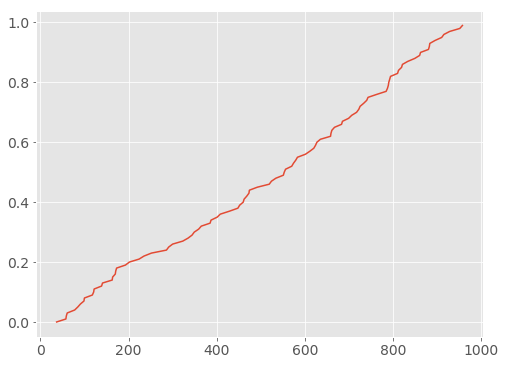

In [5]:
import random
import numpy as np
a = random.sample(range(1000), 100)

plt.plot(np.sort(a), np.linspace(0, 1, len(a), endpoint=False))